In [1]:
import numpy as np
import matplotlib.pyplot as plot
import dsp

### Generate Noise

In [2]:
from dsp import sine_wave, triangle_wave, square_wave, chirp_wave_linear, chirp_wave_hyperbolic, chirp_wave_exponential, pulse_wave

# sie_ = sine_wave(show=True)
# triangle_ = triangle_wave(show=True)
# square_ = square_wave(show=True)
# chirp_linear_ = chirp_wave_linear(show=True)
# chirp_hyperbolic_ = chirp_wave_hyperbolic(show=True)
# chirp_exponential_ = chirp_wave_exponential(show=True)
# pulse_ = pulse_wave(show=True)

### Add Noise

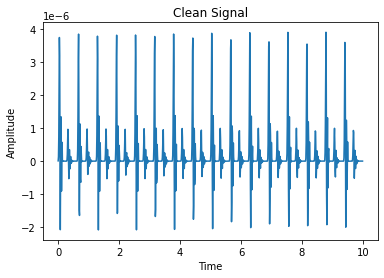

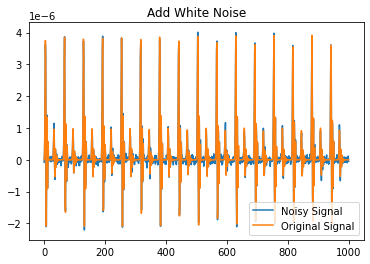

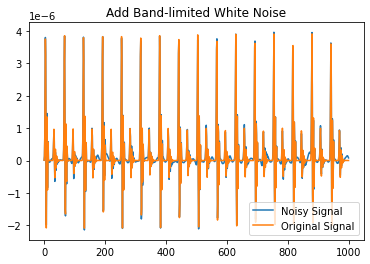

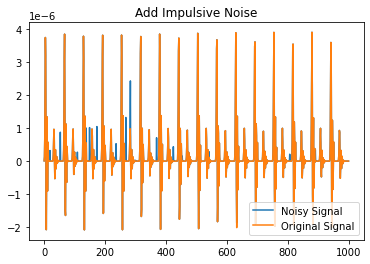

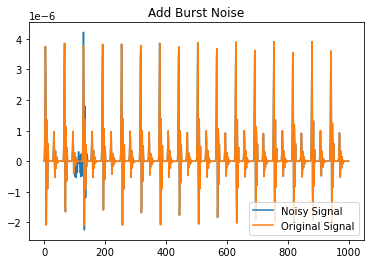

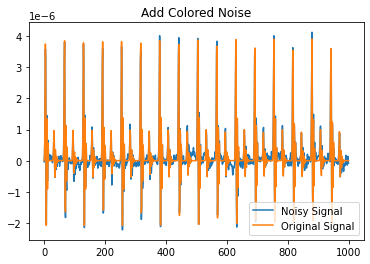

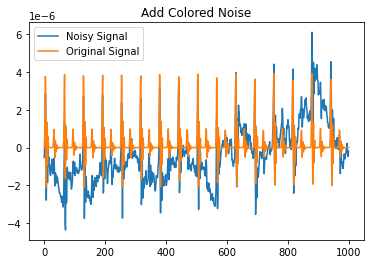

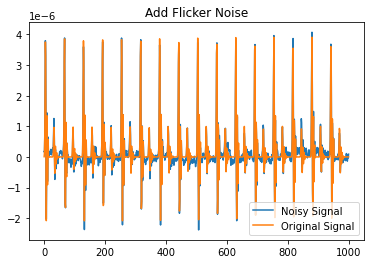

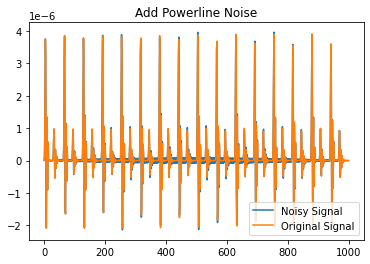

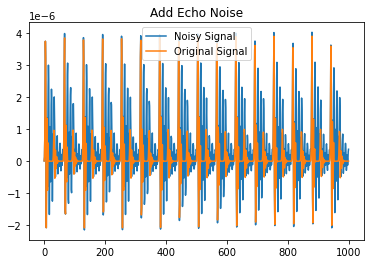

In [4]:
from dsp import add_white_noise, add_band_limited_white_noise, add_impulsive_noise, add_burst_noise, add_colored_noise
from dsp import add_flicker_noise, add_thermal_noise, add_powerline_noise, add_echo_noise
from Dataset import load_scg
import matplotlib.pyplot as plt

signals_clean, labels_clean, duration, fs = load_scg(0, 'train')
signal = signals_clean[0]
sampling_rate = fs

time = np.linspace(0, duration, sampling_rate * duration, endpoint=False)

plt.plot(time, signal)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('Clean Signal')

signal_with_white_noise = add_white_noise(signal, show=True)
signal_with_band_limited_white_noise = add_band_limited_white_noise(signal, noise_amplitude=0.3, show=True)
signal_with_impulsive_noise = add_impulsive_noise(signal, noise_amplitude=1, number=25, show=True)
signal_with_burst_noise = add_burst_noise(signal, noise_amplitude=0.3, show=True)
signal_with_pink_noise = add_colored_noise(signal, model=0, show=True)
signal_with_brown_noise = add_colored_noise(signal, model=1, show=True)
signal_with_flicker_noise = add_flicker_noise(signal, show=True)
# signal_with_thermal_noise = add_thermal_noise(signal, show=True)
signal_with_power_line = add_powerline_noise(signal, show=True)


attenuation_factor = [0.8, 0.6, 0.4]
delay_factor = [10, 20, 30]
noisy_signal = add_echo_noise(signal, 3, attenuation_factor, delay_factor, show=True)



### Decompose

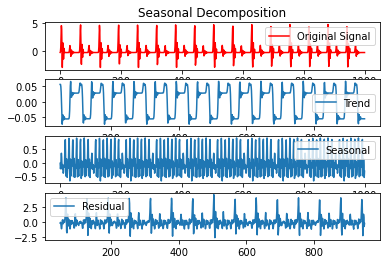

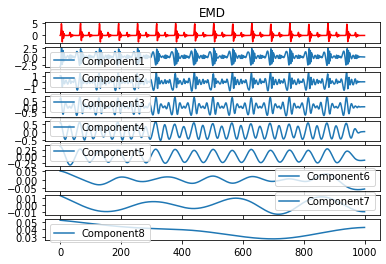

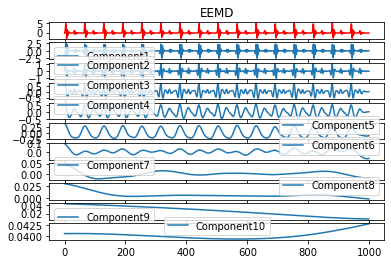

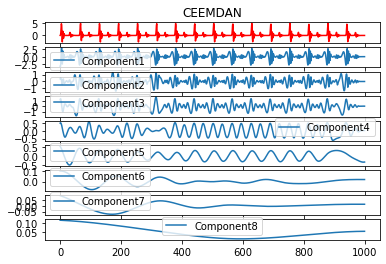

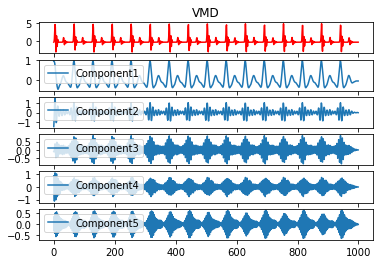

array([[ 9.37938124e-01,  9.28839393e-01,  9.01854187e-01, ...,
        -5.83947861e-02, -5.86824326e-02, -5.82818150e-02],
       [-1.45764131e+00, -7.65383887e-01,  2.78447869e-01, ...,
        -5.24765275e-04, -9.95336698e-03, -1.55067847e-02],
       [-1.04729389e-01, -1.26225566e-01, -2.28434296e-02, ...,
         5.45152771e-03,  1.94490792e-03, -4.84929868e-03],
       [ 8.85342346e-01, -4.69213504e-01, -1.12615415e+00, ...,
         2.79161569e-03,  4.48721612e-03, -3.84758787e-03],
       [-2.87116211e-01,  3.45046615e-01,  2.05587662e-01, ...,
         8.47173977e-03,  1.68535962e-02, -1.42253286e-02]])

In [11]:
from dsp import seasonal_decomposition, emd_decomposition, eemd_decomposition,ceemd_decomposition, vmd_decomposition

_ = seasonal_decomposition(signal, show=True)
_ = emd_decomposition(signal, show=True)
_ = eemd_decomposition(signal, show=True)
_ = ceemd_decomposition(signal, show=True)
_ = vmd_decomposition(signal, show=True)
# serial_emd_decomposition(signals[:5, :], num_interval=5)

### Filter

#### Linear Filter

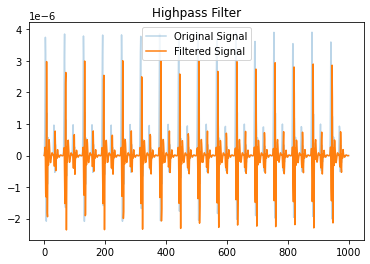

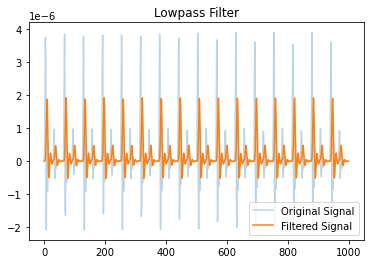

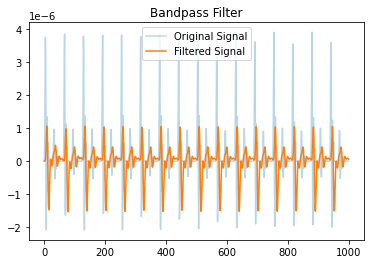

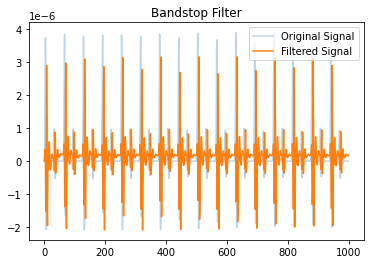

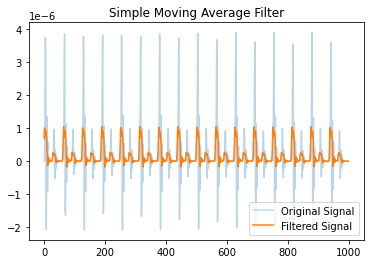

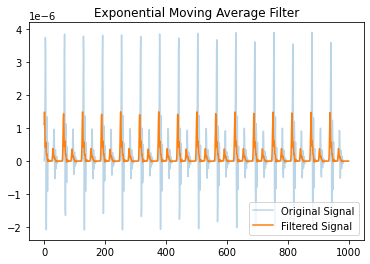

In [15]:
from dsp import butter_highpass_filter, butter_lowpass_filter, butter_bandpass_filter, butter_bandstop_filter
from dsp import simple_moving_average_filter, exponential_moving_average_filter

filtered_signal_1 = butter_highpass_filter(signal, show=True)
filtered_signal_2 = butter_lowpass_filter(signal, show=True)
filtered_signal_3 = butter_bandpass_filter(signal, show=True)
filtered_signal_4 = butter_bandstop_filter(signal, show=True)
filtered_signal_5 = simple_moving_average_filter(signal, show=True)
filtered_signal_6 = exponential_moving_average_filter(signal, show=True)


#### Advanced Filter


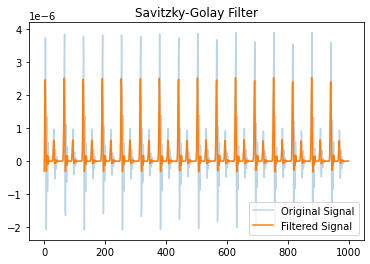

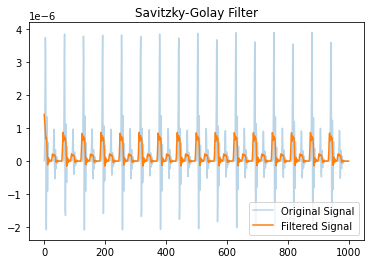

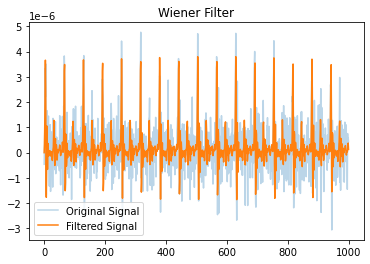

In [30]:
from dsp import savgol_filter, wiener_filter

filtered_signal_7 = savgol_filter(signal, window_length=4, show=True)
filtered_signal_8 = savgol_filter(signal, window_length=12, show=True)

noise_amp = 0.2
noise = np.random.normal(loc=0.0, scale=1.0*noise_amp, size=signal.shape) * np.max(signal)
filtered_signal_9 = wiener_filter(signal + noise, noise, show=True)
